In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
# Load the datasets
debt_df = pd.read_csv('/content/HstDebt_17900101_20230930.csv')
household_df = pd.read_csv('/content/TTLHH.csv')
gdp_df = pd.read_csv('/content/GDP.csv')
population_df = pd.read_csv('/content/Population.csv')

In [8]:
# Preprocess and rename columns correctly, format dates correctly

# Debt data preprocessing
debt_df['Record Date'] = pd.to_datetime(debt_df['Record Date'])
debt_df['Year'] = debt_df['Record Date'].dt.year
debt_df.rename(columns={'Debt Outstanding Amount': 'Debt'}, inplace=True)

# Household data preprocessing and unit adjustment (thousands to actual)
household_df['DATE'] = pd.to_datetime(household_df['DATE'], errors='coerce')
household_df['Year'] = household_df['DATE'].dt.year
household_df = household_df[household_df['TTLHH'] != '.']
household_df['Households'] = household_df['TTLHH'].astype(float) * 1000  # Adjust unit from thousands to actual

# GDP data preprocessing and unit adjustment (billions to dollars)
gdp_df['DATE'] = pd.to_datetime(gdp_df['DATE'])
gdp_df['Year'] = gdp_df['DATE'].dt.year
gdp_df['GDP'] = gdp_df['GDP'] * 1e9  # Adjust unit from billions to dollars

# Population data preprocessing and unit adjustment (thousands to actual)
population_df['DATE'] = pd.to_datetime(population_df['DATE'])
population_df['Year'] = population_df['DATE'].dt.year
population_df.rename(columns={'B230RC0A052NBEA': 'Population'}, inplace=True)
population_df['Population'] = population_df['Population'] * 1000  # Adjust unit from thousands to actual

# Merge the datasets on 'Year'
merged_df = pd.merge(debt_df[['Year', 'Debt']], household_df[['Year', 'Households']], on='Year')
merged_df = pd.merge(merged_df, gdp_df[['Year', 'GDP']], on='Year')
merged_df = pd.merge(merged_df, population_df[['Year', 'Population']], on='Year')

# Calculate Debt Per Household
merged_df['Debt Per Household'] = merged_df['Debt'] / merged_df['Households']

<ipython-input-8-58fa037467ee>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  household_df['Households'] = household_df['TTLHH'].astype(float) * 1000  # Adjust unit from thousands to actual


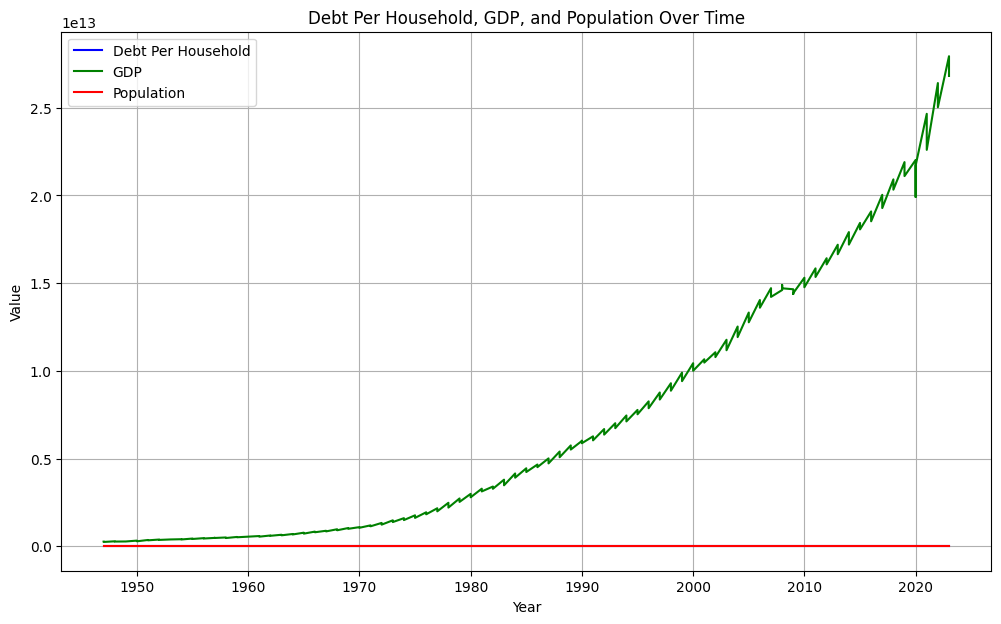

In [9]:
# Normal Scale Chart
plt.figure(figsize=(12, 7))
plt.plot(merged_df['Year'], merged_df['Debt Per Household'], label='Debt Per Household', color='blue')
plt.plot(merged_df['Year'], merged_df['GDP'], label='GDP', color='green')
plt.plot(merged_df['Year'], merged_df['Population'], label='Population', color='red')
plt.title('Debt Per Household, GDP, and Population Over Time')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

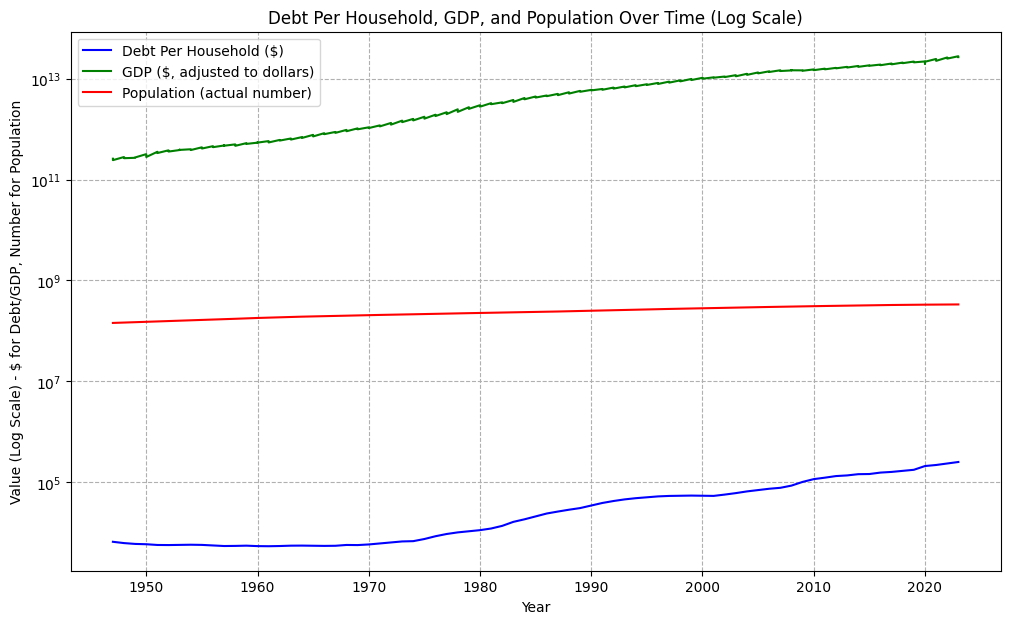

In [21]:
# Log Scale Chart with Enhanced X Labels and Y Label Description
plt.figure(figsize=(12, 7))

# Plotting each series with appropriate labels and colors
plt.plot(merged_df['Year'], merged_df['Debt Per Household'], label='Debt Per Household ($)', color='blue')
plt.plot(merged_df['Year'], merged_df['GDP'], label='GDP ($, adjusted to dollars)', color='green')
plt.plot(merged_df['Year'], merged_df['Population'], label='Population (actual number)', color='red')

# Adjusting the scale of the y-axis to log for a better visualization of data
plt.yscale('log')

# Setting a more descriptive y-axis label to reflect the log scale and units involved
plt.ylabel('Value (Log Scale) - $ for Debt/GDP, Number for Population')

# Additional chart elements for clarity and aesthetics
plt.title('Debt Per Household, GDP, and Population Over Time (Log Scale)')
plt.xlabel('Year')
plt.legend()
plt.grid(True, which="both", ls="--")

plt.show()